# TA1 - Bluring
### Nesta atividade, serão comparados diferentes métodos de bluring, apresentar suas aplicações, vantagens e desvantagens.

## Importação das bibliotecas e imagens
### A imagem utilizada será da monalisa. A escolha dela se baseia na presença de contornos bem definidos, de ruídos e da riqueza de detalhes e texturas.

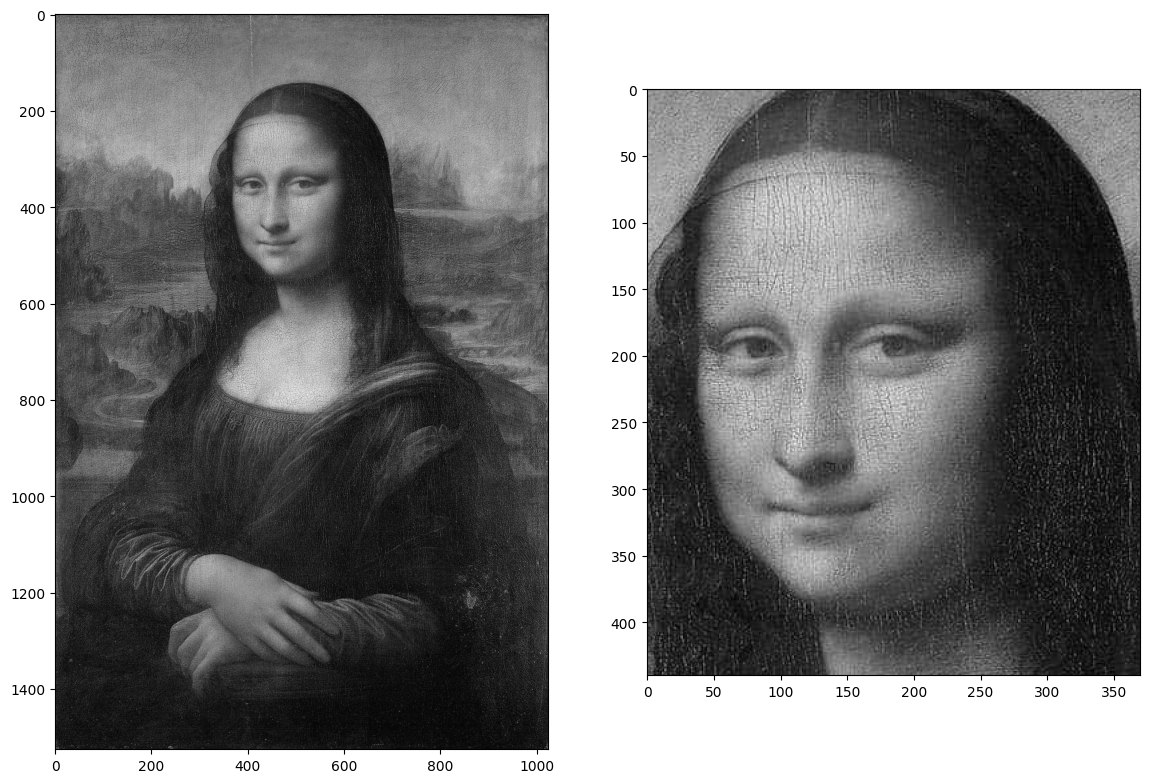

In [6]:
import cv2 as cv
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

model = cv.imread('./monalisa.jpg')
model = cv.cvtColor(model, cv.COLOR_RGB2GRAY)
fig, axes = plt.subplots(1, 2, figsize=(14,12))
axes[0].imshow(model, 'gray')
axes[1].imshow(model[160:600,330:700], 'gray')

## Média
### O blur com base na média é o método mais simples no processamento de imagens. Pode ser bem útil na remoção de ruídos de baixa frequência (mudanças graduais e suaves na intensidade dos pixels). Pode levar a perda significativa de detalhes, principalmente em áreas com texturas finas. Por ser um filtro linear, é adequado em aplicações em tempo real.

In [5]:
def mean_blur(kernel):
    global model
    global mean
    mean = cv.blur(model, (kernel,kernel))
    fig, axes = plt.subplots(1, 2, figsize=(14,12))
    axes[0].imshow(mean, 'gray')
    axes[1].imshow(mean[160:600,330:700], 'gray')
    
interactive(mean_blur, kernel=(3,25,2))

interactive(children=(IntSlider(value=13, description='kernel', max=25, min=3, step=2), Output()), _dom_classe…

## Mediana
### O blur por mediana favorece a presença das bordas, como se pode ver no contorno do rosto da imagem. Além disso, é útil para remover ruídos "salt and pepper", que são pixels com valores extremos causados, normalmente, por falhas na câmera, transmissão ou corrupção de dados. É um filtro não linear, mas recomendado para aplicações em tempo real.

In [7]:
def median_blur(kernel):
    global model
    global median
    median = cv.medianBlur(model, kernel)
    fig, axes = plt.subplots(1, 2, figsize=(14,12))
    axes[0].imshow(median, 'gray')
    axes[1].imshow(median[160:600,330:700], 'gray')    
    
interactive(median_blur, kernel=(3,25,2))

interactive(children=(IntSlider(value=13, description='kernel', max=25, min=3, step=2), Output()), _dom_classe…

## Gaussian
### Por ser uma média ponderada em relação a distância do centro do kernel, os valores dos pixels são mais representativos. Dessa forma, esse método mantém uma aparência mais natural na imagem. Detalhes ainda são perdidos por conta da suavização. É um filtro linear, também recomendado para aplicações em tempo real.

In [8]:
def gaussian_blur(kernel):
    global model
    global gaussian
    gaussian = cv.GaussianBlur(model, (kernel, kernel), 0)
    fig, axes = plt.subplots(1, 2, figsize=(14,12))
    axes[0].imshow(gaussian, 'gray')
    axes[1].imshow(gaussian[160:600,330:700], 'gray')    
    
interactive(gaussian_blur, kernel=(3,125,2))

interactive(children=(IntSlider(value=63, description='kernel', max=125, min=3, step=2), Output()), _dom_class…

## Bilateral
### O filtro bilateral é a junção de uma Gaussiana com um mapa de intensidade em relação ao pixel central do kernel. Ou seja, se as distâncias das intensidade do pixel central com o analisado for baixa, o segundo terá uma média ponderada com valor mais alto, caso contrário a ponderação será baixa. Dessa forma, mudanças abruptas possuem valor baixo no cálculo do filtro, o que influencia na preservação de detalhes e texturas enquanto remove ruídos e suaviza a imagem. É um filtro não linear com maior custo computacional, não sendo recomendado para aplicações em tempo real.

In [9]:
def bilateral_blur(diameter, sigmaColor, sigmaSpace):
    global model
    global bilateral
    bilateral = cv.bilateralFilter(model, diameter, sigmaColor, sigmaSpace)
    fig, axes = plt.subplots(1, 2, figsize=(14,12))
    axes[0].imshow(bilateral, 'gray')
    axes[1].imshow(bilateral[160:600,330:700], 'gray')   
    
interactive(bilateral_blur, diameter=(1,100), sigmaColor=(1,100), sigmaSpace=(1,100))

interactive(children=(IntSlider(value=50, description='diameter', min=1), IntSlider(value=50, description='sig…